In [46]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats
import scikit_posthocs as sp
plt.rcParams['pdf.fonttype'] = 42

In [32]:
data = pd.read_csv('summary.csv')
data

strain genotype  stage  strain_num  spindle app  nuc div  duration
0   HS306       WT      2           1            5       23        18
1   HS306       WT      2           1           13       31        18
2   HS306       WT      2           1           23       37        14
3   HS306       WT      2           1           27       53        26
4   HS306       WT      2           1           23       43        20
..    ...      ...    ...         ...          ...      ...       ...
74  HS309   wee1op      4           3           17       31        14
75  HS309   wee1op      4           3           15       32        17
76  HS309   wee1op      4           3           48       58        10
77  HS309   wee1op      4           3           29       45        16
78  HS309   wee1op      4           3           47       61        14

[79 rows x 7 columns]

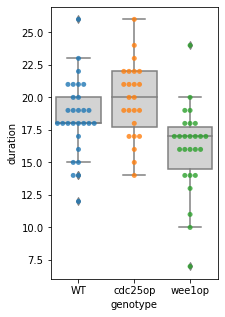

WT: n=29
cdc25op: n=24
wee1op: n=26


In [47]:
plt.figure(figsize=(3,5))
sns.boxplot(data=data, x='genotype', y='duration', color='lightgray')
sns.swarmplot(data=data, x='genotype', y='duration',alpha=0.8)
plt.savefig('duration.pdf')
plt.show()
print('WT: n=' + str(len(data.loc[data['genotype'] == 'WT'])))
print('cdc25op: n=' + str(len(data.loc[data['genotype'] == 'cdc25op'])))
print('wee1op: n=' + str(len(data.loc[data['genotype'] == 'wee1op'])))

In [45]:
print('Mean')
print(data.groupby('genotype').mean()['duration'])

print(' ')
print('Median')
print(data.groupby('genotype').median()['duration'])

Mean
genotype
WT         18.517241
cdc25op    19.791667
wee1op     16.076923
Name: duration, dtype: float64
 
Median
genotype
WT         18.0
cdc25op    20.0
wee1op     17.0
Name: duration, dtype: float64


<AxesSubplot:xlabel='duration', ylabel='Count'>

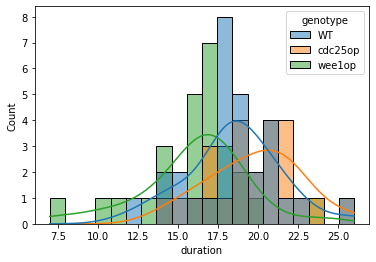

In [34]:
sns.histplot(data=data, x='duration', hue='genotype', kde=True, bins=20)

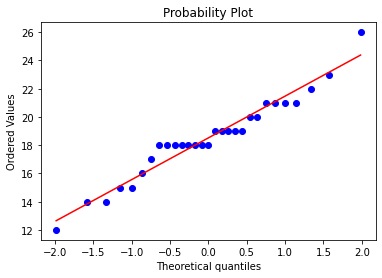

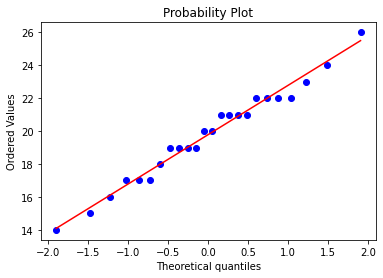

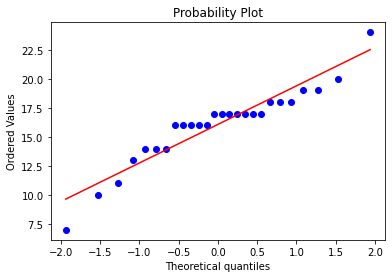

In [35]:
#Q-Q plot
stats.probplot(data.loc[data['genotype'] == 'WT', 'duration'], plot=plt)
plt.show()

stats.probplot(data.loc[data['genotype'] == 'cdc25op', 'duration'], plot=plt)
plt.show()

stats.probplot(data.loc[data['genotype'] == 'wee1op', 'duration'], plot=plt)
plt.show()

In [36]:
# Shapiro test
print(stats.shapiro(data.loc[data['genotype'] == 'WT', 'duration'])[1])
print(stats.shapiro(data.loc[data['genotype'] == 'cdc25op', 'duration'])[1])
print(stats.shapiro(data.loc[data['genotype'] == 'wee1op', 'duration'])[1])

0.4042559862136841
0.9189369082450867
0.049983616918325424


In [37]:
# U test
print('WT vs cdc25op')
print(stats.mannwhitneyu(data.loc[data['genotype'] == 'WT', 'duration'], 
                         data.loc[data['genotype'] == 'cdc25op', 'duration'], alternative='two-sided'))
print(' ')

print('cdc25op vs wee1op')
print(stats.mannwhitneyu(data.loc[data['genotype'] == 'cdc25op', 'duration'], 
                         data.loc[data['genotype'] == 'wee1op', 'duration'], alternative='two-sided'))
print(' ')

print('wee1op vs WT')
print(stats.mannwhitneyu(data.loc[data['genotype'] == 'wee1op', 'duration'], 
                         data.loc[data['genotype'] == 'WT', 'duration'], alternative='two-sided'))
print(' ')

WT vs cdc25op
MannwhitneyuResult(statistic=256.0, pvalue=0.09946091741820945)
 
cdc25op vs wee1op
MannwhitneyuResult(statistic=506.5, pvalue=0.0001489871612317012)
 
wee1op vs WT
MannwhitneyuResult(statistic=197.0, pvalue=0.002289998289268508)
 


In [38]:
# Steel-Dwass test
sp.posthoc_dscf(data, val_col='duration', group_col='genotype')

WT   cdc25op    wee1op
WT       1.000000  0.222459  0.006302
cdc25op  0.222459  1.000000  0.001000
wee1op   0.006302  0.001000  1.000000